In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
#print(df_train.columns, df_test.columnsumns)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

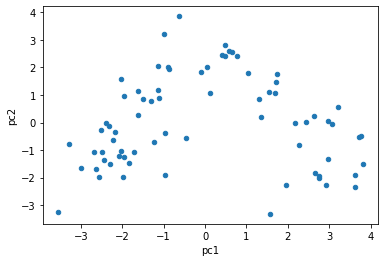

In [3]:
pca = PCA(n_components=2)
testPC = pca.fit_transform(StandardScaler().fit_transform(df_test.drop('index', axis=1).values))
tpcDf = pd.DataFrame(data = testPC, columns = ['pc1', 'pc2'])

tpcDf.plot.scatter('pc1', 'pc2')

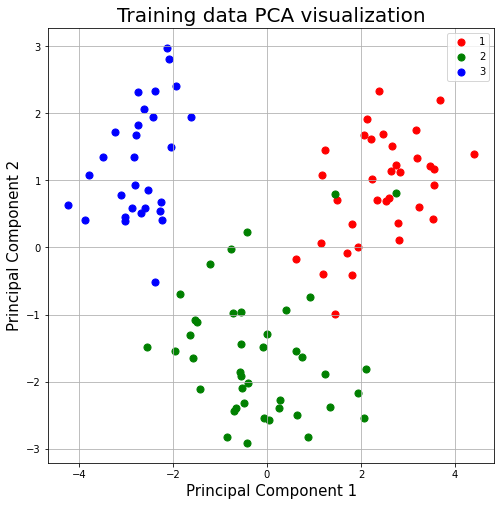

In [4]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(df_train.drop('Target', axis=1).values))
trpcDf = pd.concat([pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2']), df_train[['Target']]], axis = 1)
trpcDf.columns = ['pc1', 'pc2', 'tgt']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('Training data PCA visualization', fontsize = 20)


targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = trpcDf['tgt'] == target
    ax.scatter(trpcDf.loc[indicesToKeep, 'pc1']
               , trpcDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [5]:
pca.explained_variance_ratio_

array([0.37426421, 0.18663864])

In [18]:
def plotPredictions(predictions):
    pred_df = pd.concat([tpcDf, pd.Series(predictions)], axis = 1)
    pred_df.columns = ['pc1', 'pc2', 'tgt']

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)

    ax.set_title('2 Component PCA:', fontsize = 20)


    targets = [1, 2, 3]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = pred_df['tgt'] == target
        ax.scatter(pred_df.loc[indicesToKeep, 'pc1']
                   , pred_df.loc[indicesToKeep, 'pc2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()   

In [7]:
x_train = StandardScaler().fit_transform(df_train.drop('Target', axis=1).values)
y_train = df_train["Target"].values
x_test = StandardScaler().fit_transform(df_test.drop('index', axis=1).values)
print (x_train.shape, y_train.shape, x_test.shape)

(106, 13) (106,) (72, 13)


In [8]:
from sklearn import svm

lin_clf = svm.LinearSVC()
lin_clf.fit(x_train, y_train)
#dec = lin_clf.decision_function([[1]])
#dec.shape[1]

LinearSVC()

In [9]:
from sklearn.model_selection import GridSearchCV

#Create a svm Classifier and hyper parameter tuning 
ml = svm.SVC() 
  
# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=15)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    0.8s finished


In [10]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [11]:
print(grid_search.best_score_ *100)

99.04761904761905


[3 3 2 1 2 2 2 3 1 1 2 2 2 1 2 2 1 1 1 1 3 2 2 2 1 2 1 1 2 3 3 1 2 1 2 3 1
 3 2 1 2 1 3 1 2 2 2 2 3 3 1 3 2 1 3 2 2 2 1 2 1 3 3 3 3 2 1 1 2 1 3 2]


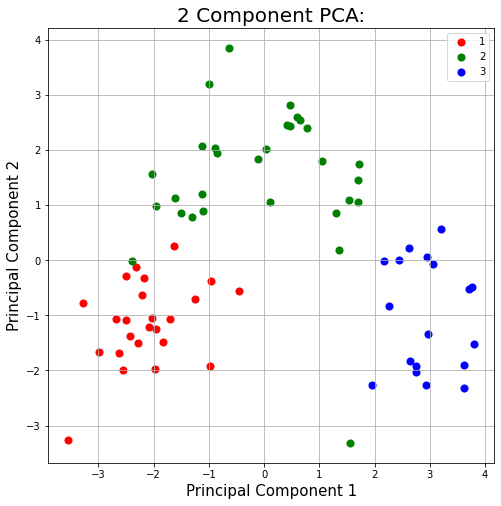

In [12]:
y_test = grid.predict(x_test)
print(y_test)

plotPredictions(y_test)
#test_accuracy=accuracy_score(y_test,y_test_hat)*100
#test_accuracy
#print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

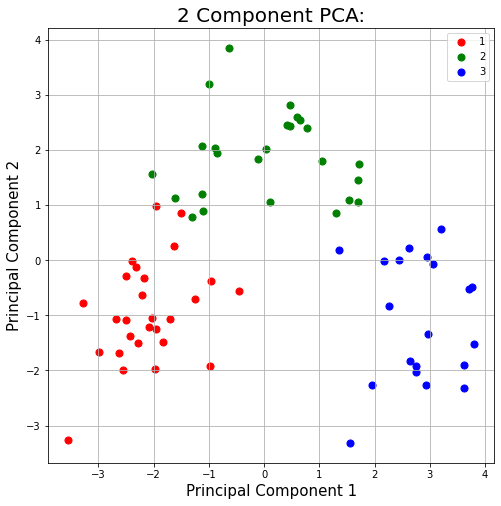

In [19]:
#knn

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6) 
neigh.fit(x_train, y_train)
knn_predictions = neigh.predict(x_test)

plotPredictions(knn_predictions)

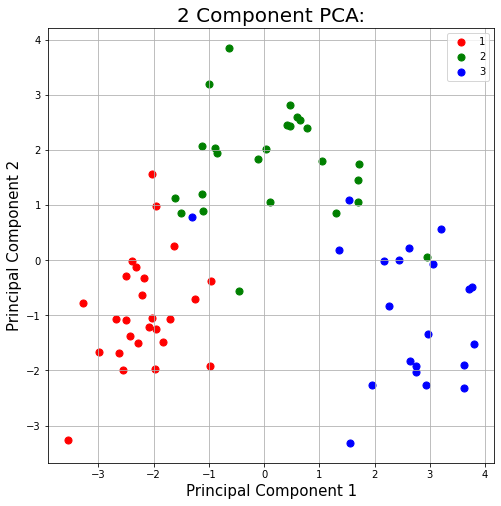

In [14]:
from sklearn import tree

tree_classifier = tree.DecisionTreeClassifier().fit(x_train, y_train)
tree_predictions = tree_classifier.predict(x_test)

plotPredictions(tree_predictions)


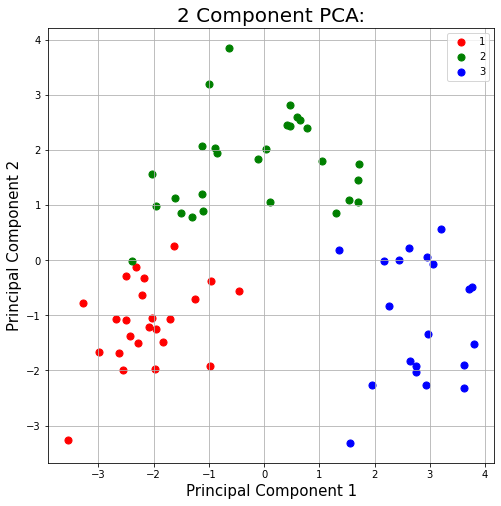

In [15]:
#ensemble -- random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
random_forest_classifier = RandomForestClassifier(max_depth=5, random_state=0).fit(x_train, y_train)
random_forest_predictions = random_forest_classifier.predict(x_test)

plotPredictions(random_forest_predictions)

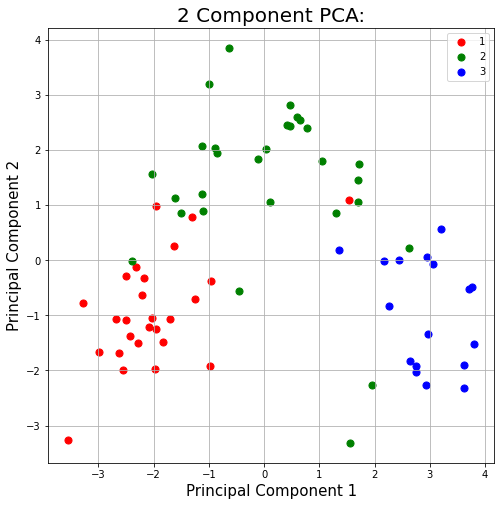

In [16]:
#gradient boosting

from sklearn.ensemble import GradientBoostingClassifier


gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
gradient_boosting_predictions = gradient_boosting_classifier.predict(x_test)

plotPredictions(gradient_boosting_predictions)

In [21]:
submission_df = pd.DataFrame(random_forest_predictions, columns = ["Target"])
submission_df.index.name = "index"
submission_df.to_csv("submission.csv")